# 2020 Kaggle Machine Learning & Data Science Survey

Kaggle is a community of data scientists and machine learning practitioners which aims to solve modern problems, practice programming and study general problems using statistics, data visualization and ML. Every year kaggle hosts a survey to acquire data about its community, from questions that range from personal info like gender and age to profissional information. 
Diversity and inclusion initiatives in computer related areas are more common than before, so one interested in this matter would naturally ask: how's kaggle community in this matter?

In [1]:
!pip install --upgrade seaborn
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

import os

df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df = df.drop(df.index[0])
questions = df.columns

sns.set_style("whitegrid")

     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Let's start with general demographics!
* Instead of many plotings let's write tables for the most basic relations. This will describe to us the basic results in a more concise way.

In [2]:
# Getting some information about general demographics
print('Total sample size: {}\n'.format(df.shape[0]))
print(df["Q2"].value_counts().apply(lambda x: str(round(x/df.shape[0]*100, 3)) + "%"))
print('\n')
print(df["Q3"].value_counts().apply(lambda x: str(round(x/df.shape[0]*100, 3)) + "%"))
print('\n')
print(df["Q4"].value_counts().apply(lambda x: str(round(x/df.shape[0]*100, 3)) + "%"))
print('\n')
print(df["Q6"].value_counts().apply(lambda x: str(round(x/df.shape[0]*100, 3)) + "%"))

Total sample size: 20036

Man                        78.803%
Woman                      19.355%
Prefer not to say           1.313%
Prefer to self-describe      0.27%
Nonbinary                    0.26%
Name: Q2, dtype: object


India                                                   29.202%
United States of America                                11.165%
Other                                                    6.928%
Brazil                                                   3.464%
Japan                                                    3.184%
Russia                                                   2.905%
United Kingdom of Great Britain and Northern Ireland     2.441%
Nigeria                                                  2.376%
China                                                    2.366%
Germany                                                  2.016%
Turkey                                                   1.717%
Spain                                                    1.677%
Franc

Summarzing the first findings:
* Men are predominant in Kaggle, women compose only 19.35% of userbase while non-binary are 0.26%, self-describing are 0.25% and the rest 1.2% prefer not to anwser, we'll join this three groups in a distinct group.
* Most part of the base are from India, composing 29%! Being seconded by USA with 11%, the next countries are Brazil, Japan and Russia with approxametly 3% of the base each.
* Suprisingly this sample has a big percentage of users with higher education (\~85% has at least a bacheloor degree). And also experienced in programming (~80% has been written codes for more than 1 year and more than 50% writes codes for more than 2 years.)

Now let'starint exploring differences between women and men demographic!

In [3]:
df['gender'] = df['Q2'].apply(lambda x: x if x in ('Woman', 'Man') else 'Minorities')
print('Man and Woman compose almost 98% of our sample, so lets join non-binary,\nself-described and no-anwser under "others" \n{}'.format(df["gender"].value_counts()))

Man and Woman compose almost 98% of our sample, so lets join non-binary,
self-described and no-anwser under "others" 
Man           15789
Woman          3878
Minorities      369
Name: gender, dtype: int64


In [4]:
def plot_two_categorical(
    df=df, x='gender', y='Q6', order = None):
    df['dummy']=1
    groupped = df.groupby([x, y]).count().reset_index()
    groupped['%'] = groupped['dummy'].div(groupped.groupby(x)['dummy'].transform('sum'))
    
    p = sns.catplot(data = groupped, x=y, col=x, y='%', kind='bar', order=order)
    p.set_xticklabels(rotation=90)
    plt.show()
    
    #chi-sqrd statistics
    groupped_2=groupped[[x, y, 'dummy']].pivot_table(index=x, columns=y)
    stat, p, dof, expected = chi2_contingency(groupped_2.values)
    
    if p<0.05:
        print('p-value= {} \nPopulations differ'.format(p))
    
        #Plotting


#### There's difference between experience in programming?

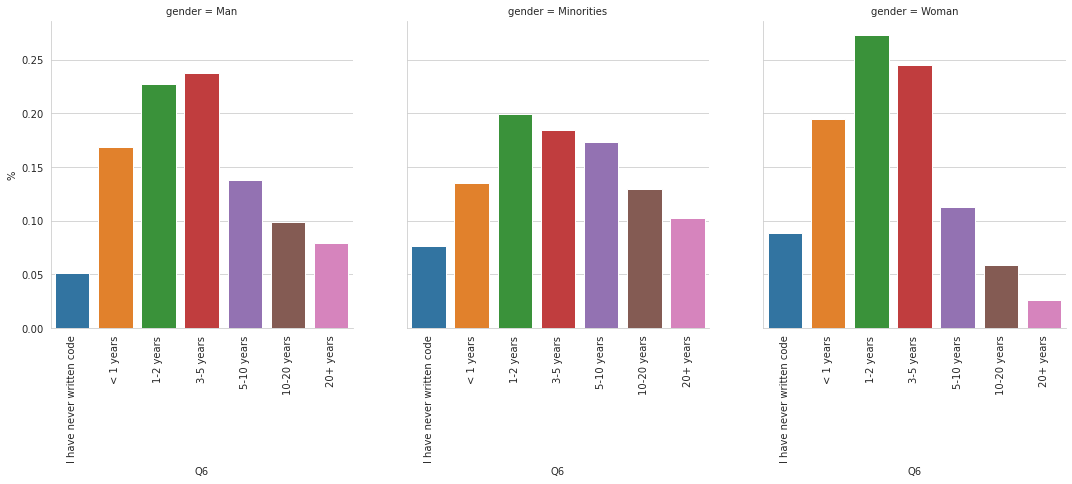

p-value= 7.486128688695623e-61 
Populations differ


In [5]:
plot_two_categorical(order=['I have never written code', '< 1 years', '1-2 years','3-5 years', '5-10 years', '10-20 years', '20+ years'])

#### There's difference between education?

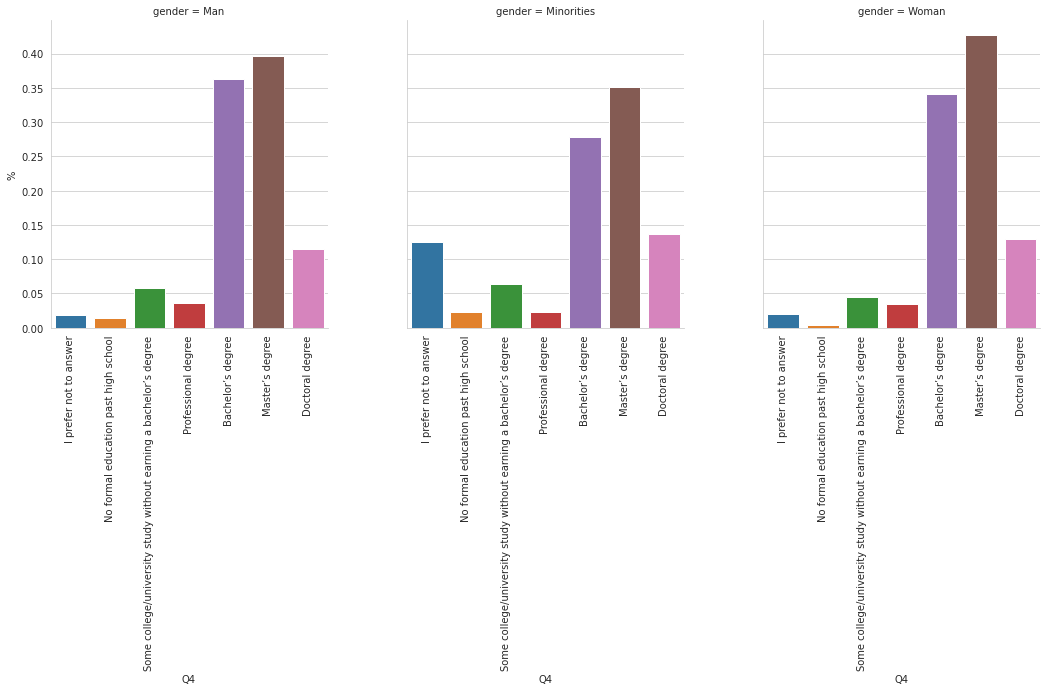

p-value= 6.637006278688215e-50 
Populations differ


In [6]:
plot_two_categorical(y='Q4', order=['I prefer not to answer','No formal education past high school','Some college/university study without earning a bachelor’s degree',
                                    'Professional degree','Bachelor’s degree',  'Master’s degree','Doctoral degree'])

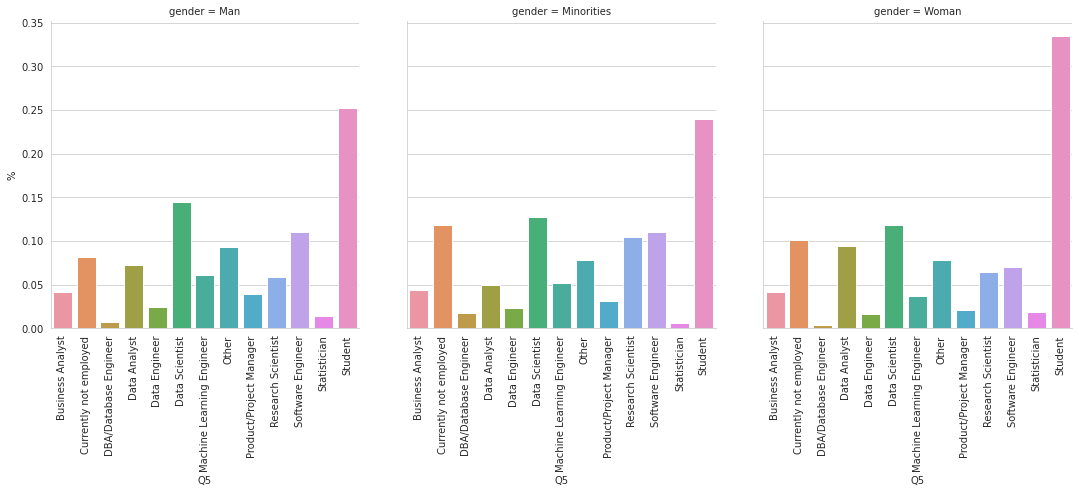

p-value= 9.705459104800516e-46 
Populations differ


In [7]:
plot_two_categorical(y='Q5')

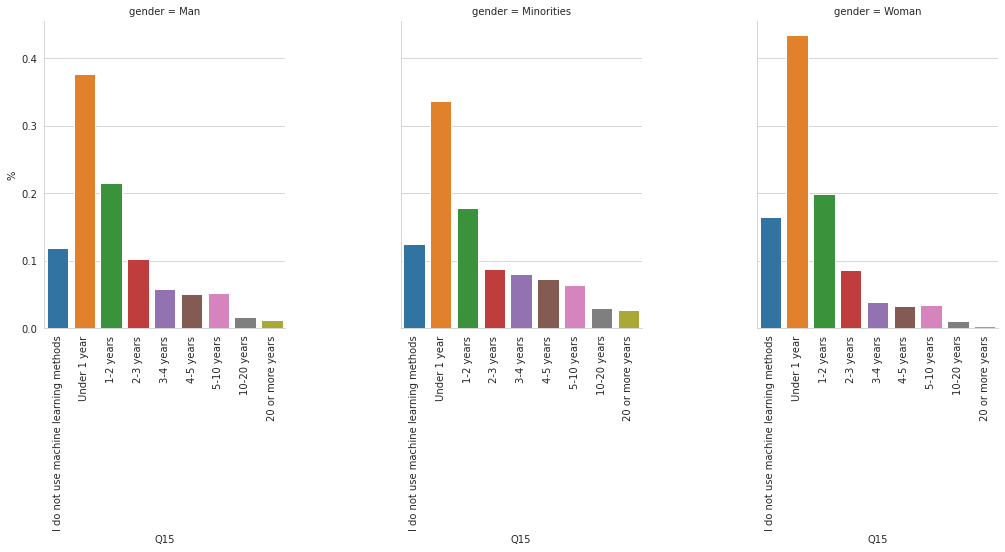

p-value= 1.7482493377030638e-26 
Populations differ


In [8]:
plot_two_categorical(y='Q15', order=['I do not use machine learning methods','Under 1 year','1-2 years', '2-3 years',
                                     '3-4 years', '4-5 years', '5-10 years','10-20 years', '20 or more years'])

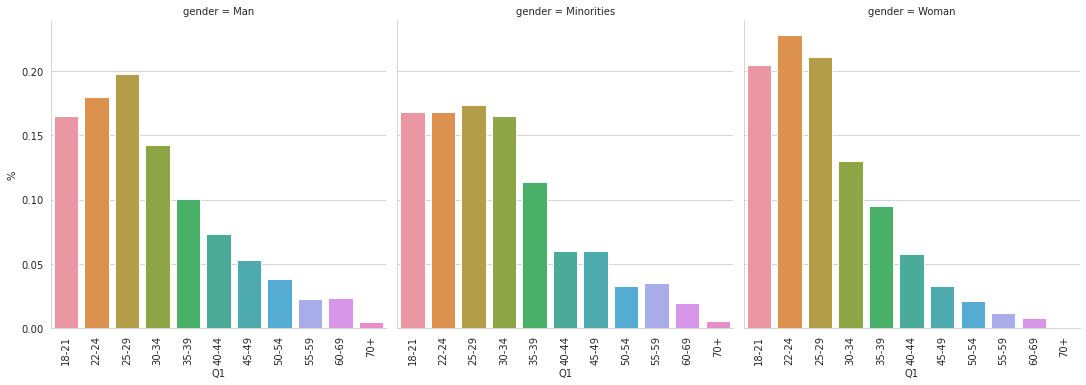

p-value= 2.131003097976882e-35 
Populations differ


In [9]:
plot_two_categorical(y='Q1')

### Summarizing

Since man compose our main demographic we'll be comparing the other two groups with this demographic.

* We've checked that by "time with programming" our classification of "minorities genders" has a higher portion of 5+ years of experience, woman demographic has a lower portion of 5+ years of experience compared to man.
* Education wise, woman demographic has a slighter high portion of people with high education (masters and doctor degree) compared to man, our classificaiton of other minorities has a high portion of "prefer not to anwser" option.
* Woman demographic has a higher portion of Data Analyst, students and unemployed, and a lower portion Engineering carrers (software, data and machine learning engineering) and Data Scientist. The classification of "other genders" are much like man, but has a higher portion of "Research Scientist".
* Just like "time with programming", "time using ML" has the same results: woman demographic has slightly less time using ML models, and other "minorities genders" has slightly more.
* An interesting insight's that the women demographic is actually younger than man, which could potentially explain the difference of quantity of years programming, job and ML programming. However how much does age explain this?

Before tackling to this questions let's explore more the man/woman demographic since they have a considerable sample size

In [36]:
def adj_experience(x):
    if x == 'I have never written code' or x=='I do not use machine learning methods':
        return '1. No experience'
    elif x == '< 1 years' or x== 'Under 1 year':
        return '2. < 1y'
    elif x == '1-2 years':
        return '3. 1y - 2y'
    elif x == '3-5 years':
        return '4. 3y - 5y'
    elif x == '5-10 years':
        return '5. 5y - 10y'
    elif x == '10-20 years':
        return '6. 10y - 20y'
    elif x == '20+ years' or x=='20 or more years':
        return '7. > 20y'
    else: 
        return x

def adj_ml_experience(x):
    if x == 'I have never written code' or x=='I do not use machine learning methods':
        return '1. No experience'
    elif x == '< 1 years' or x== 'Under 1 year':
        return '2. < 1y'
    elif x == '1-2 years':
        return '3. 1y - 2y'
    elif x == '2-3 years':
        return '4. 2y - 3y'
    elif x == '3-4 years':
        return '5. 3y - 4y'
    elif x == '4-5 years':
        return '6. 4y - 5y'
    elif x == '5-10 years':
        return '7. 5y - 10y'
    elif x == '10-20 years':
        return '8. 10y - 20y'
    elif x == '20+ years' or x=='20 or more years':
        return '9. > 20y'
    else: 
        return x

def adj_salary(x):
    if x in ['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999']:
        return '2. 1k - 10k'
    elif x in ['10,000-14,999', '15,000-19,999', '20,000-24,999']:
        return '3. 10k - 25k'
    elif x in ['25,000-29,999','30,000-39,999', '40,000-49,999']:
        return '4. 25k - 50k'
    elif x in ['50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999','90,000-99,999']:
        return '5. 50k - 100k'
    elif x =='$0-999':
        return '1. 0 - 1k'
    elif x in ['100,000-124,999', '125,000-149,999', '150,000-199,999']:
        return '6. 100k - 200k'
    elif x in ['200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']:
        return '7. >200k'
    else: 
        return x
    
df['income_adjusted']=df['Q24'].apply(lambda x: adj_salary(x))
df['exp_adjusted']=df['Q6'].apply(lambda x: adj_experience(x))
df['ML_exp_adjusted']=df['Q15'].apply(lambda x: adj_ml_experience(x))

In [34]:
def plot_pyramid_gen(
    df=df, x='Q2', y='Q3', label='Country', order='dummy'):
    if order=='dummy':
        order=list(df[y].value_counts(ascending=True).index)
    df['dummy']=1
    groupped = df.groupby([x, y]).count().reset_index()
    groupped['%'] = groupped['dummy'].div(groupped.groupby(x)['dummy'].transform('sum'))
    groupped['-%']=-1*groupped['%']
    plt.figure(figsize=(8, 12))
    bar_plot = sns.barplot(x='-%', y=y, data=groupped[groupped.Q2=='Man'], order=order)
    bar_plot = sns.barplot(x='%', y=y, data=groupped[groupped.Q2=='Woman'], order=order)

    bar_plot.set(xlabel="Population (Composition of groups)", ylabel=label, title = "Population Pyramid\nMan | Woman")

#### The demographic has different country distribution?

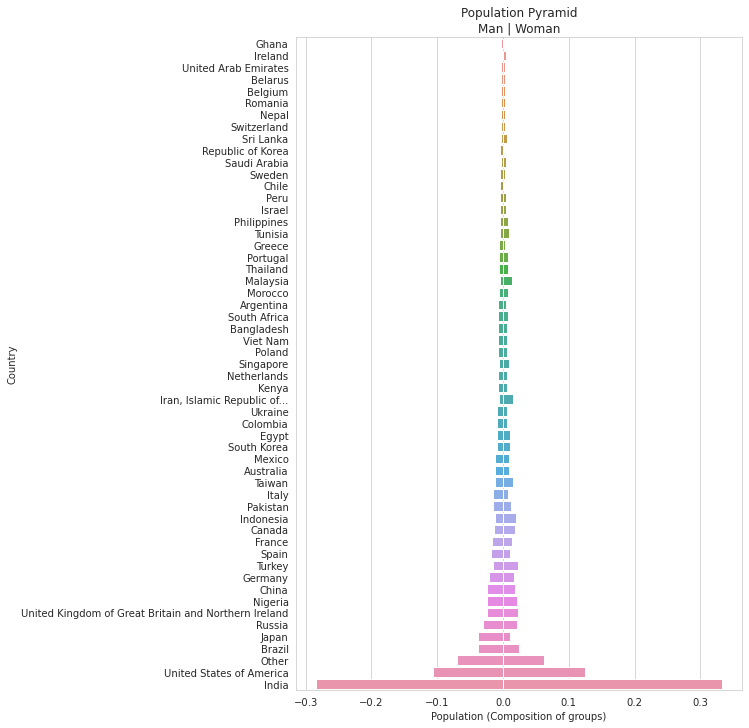

In [35]:
plot_pyramid_gen()

#### What about annual income?

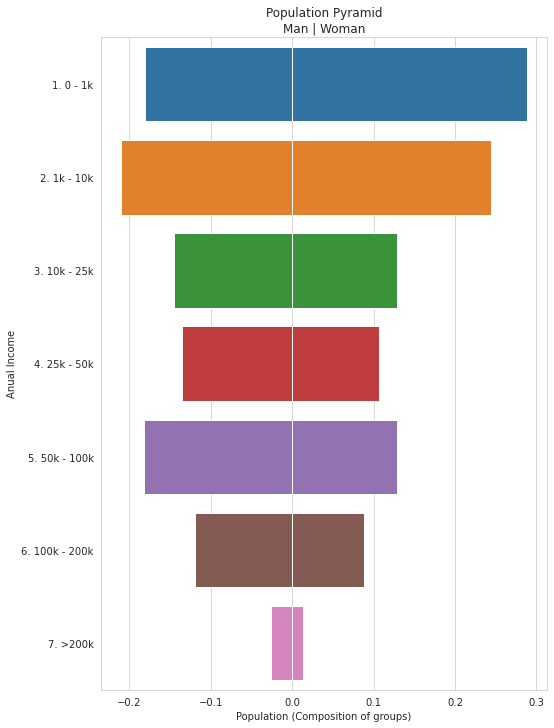

In [50]:
order_salary = []
order_salary.reverse()
plot_pyramid_gen(y='income_adjusted', label='Anual Income', order=None)

In [38]:
dfm = df[df.Q2=='Man']
dff = df[df.Q2=='Woman']

#### We've raised some questions about the relation of programming experience if it was something "gender" discriminative or more related to the age of our demographic. So let's plot different heatmaps to anwser this questions!

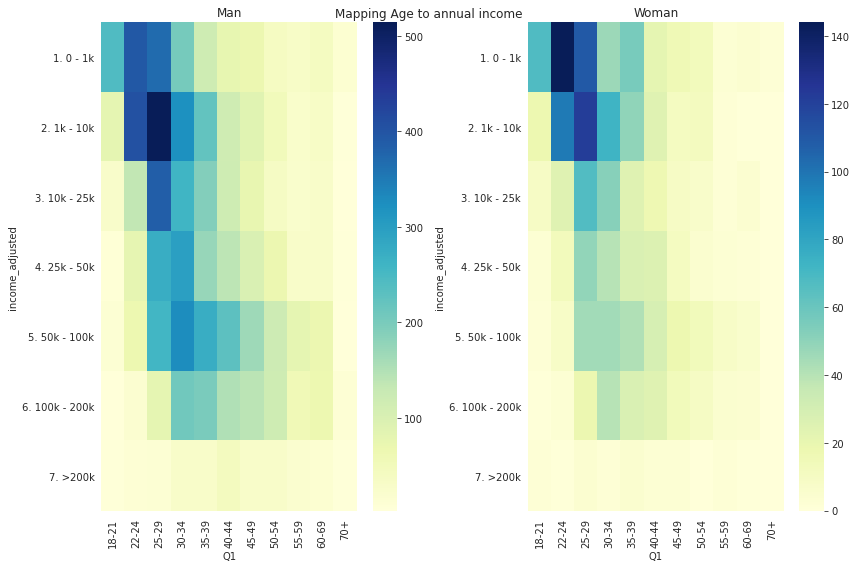

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Mapping Age to annual income')
axes[0].set_title('Man')
axes[1].set_title('Woman')
sns.heatmap(pd.crosstab(dfm['income_adjusted'],dfm['Q1']), ax=axes[0], cmap="YlGnBu")
sns.heatmap(pd.crosstab(dff['income_adjusted'],dff['Q1']), ax=axes[1], cmap="YlGnBu")
fig.tight_layout()
plt.show()

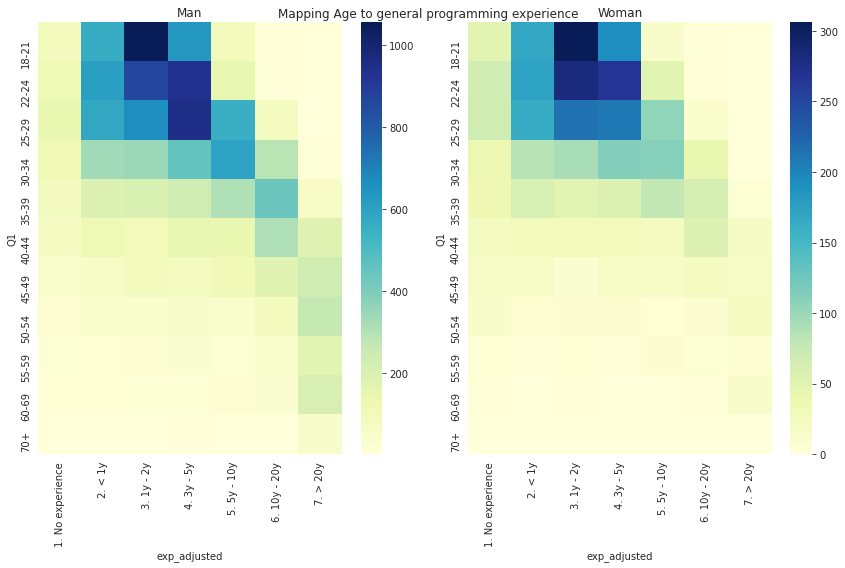

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Mapping Age to general programming experience')
axes[0].set_title('Man')
axes[1].set_title('Woman')
sns.heatmap(pd.crosstab(dfm['Q1'],dfm['exp_adjusted']), ax=axes[0], cmap="YlGnBu")
sns.heatmap(pd.crosstab(dff['Q1'],dff['exp_adjusted']), ax=axes[1], cmap="YlGnBu")
fig.tight_layout()
plt.show()

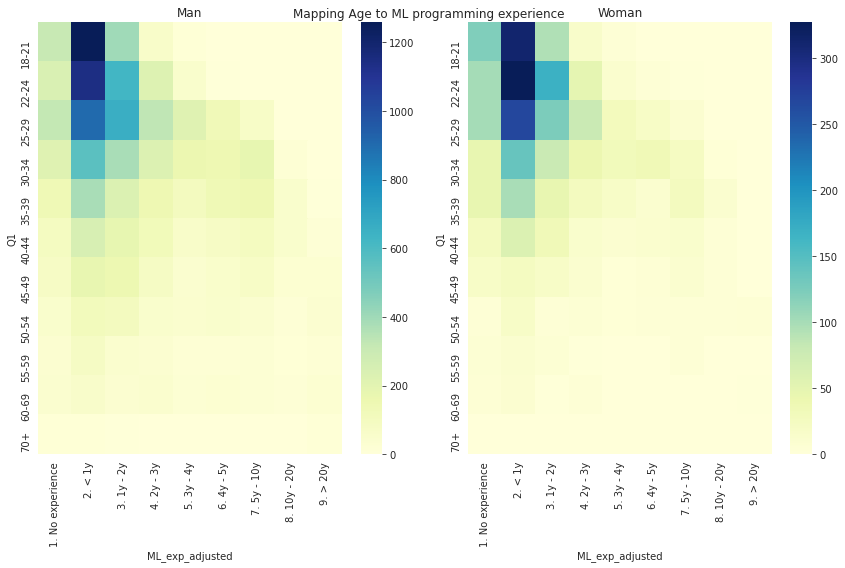

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Mapping Age to ML programming experience')
axes[0].set_title('Man')
axes[1].set_title('Woman')
sns.heatmap(pd.crosstab(dfm['Q1'],dfm['ML_exp_adjusted']), ax=axes[0], cmap="YlGnBu")
sns.heatmap(pd.crosstab(dff['Q1'],dff['ML_exp_adjusted']), ax=axes[1], cmap="YlGnBu")
fig.tight_layout()
plt.show()

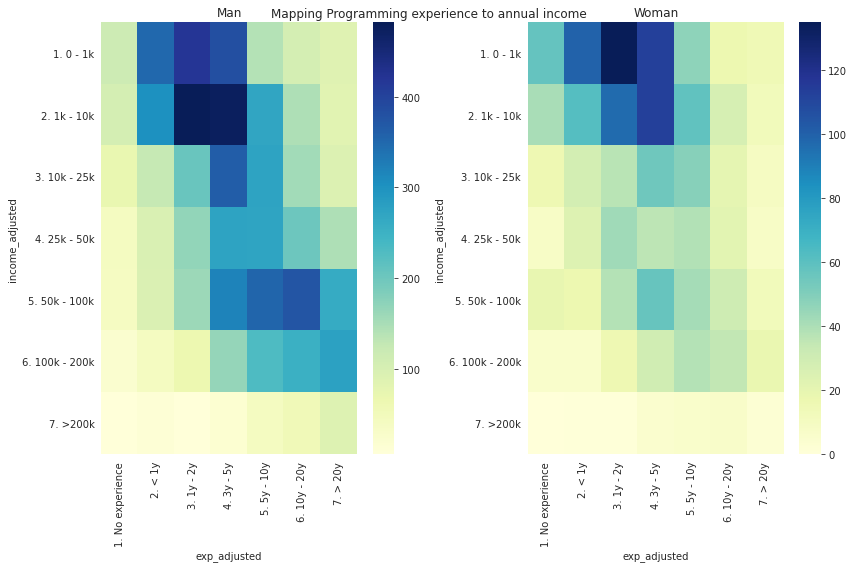

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Mapping Programming experience to annual income')
axes[0].set_title('Man')
axes[1].set_title('Woman')
sns.heatmap(pd.crosstab(dfm['income_adjusted'],dfm['exp_adjusted']), ax=axes[0], cmap="YlGnBu")
sns.heatmap(pd.crosstab(dff['income_adjusted'],dff['exp_adjusted']), ax=axes[1], cmap="YlGnBu")
fig.tight_layout()
plt.show()

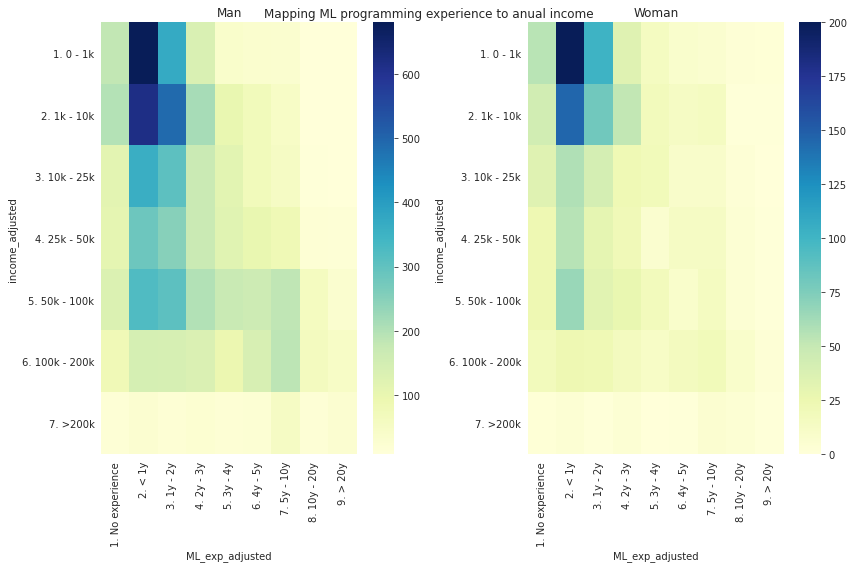

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Mapping ML programming experience to anual income')
axes[0].set_title('Man')
axes[1].set_title('Woman')
sns.heatmap(pd.crosstab(dfm['income_adjusted'],dfm['ML_exp_adjusted']), ax=axes[0], cmap="YlGnBu")
sns.heatmap(pd.crosstab(dff['income_adjusted'],dff['ML_exp_adjusted']), ax=axes[1], cmap="YlGnBu")
fig.tight_layout()
plt.show()

##### Still in work, I'm just taking the next week off

### Summarizing v2

* There's some substantial difference in ethnics, countries like USA, Japan, Brazil, Spain and Italy has less woman than man when we check the % of population composition. Countries like India, Taiwan, Turkey and Indonesia has a bigger participation in our woman sample.
* The next graph is an inverse pyramid with anual income in the y-axis, we can check that the rectangles slowly go from the right side (woman) to the left side (man) with bigger anual income.
* The next series of heatmaps shows that, generally, the correlation of age and years of experience to general income doesn't seem to be so strong for women demographic as it is for man.

One thing I would like to do a lot is to analyze different minorities, however the sample size for non-binary and self-describe genders were small.


### What could Kaggle do?

Its clear that this problems are not something particular from Kaggle, but a more structural problem found in the whole world. Only recently industries started talking about inclusion and diversity, and while this is a long term problem that needs a long term solution. One hypothesis that I thought, and certainly needs more data and study, is that currently women in data-science/programming areas doesn't seem to be appreciated as its male counterpart. Here in Brazil a Kaggle profile is asked in data-science and Machine Learning related jobs, kaggle could host or aim a campaign to woman audience? Like free classes or exclusive competitions, or something related.

### Thank you for checking here!

I'm grateful that you took your time to check this notebook out, this is my first submissions in a ongoing competition. English is not my first language, so I would appreciate if you could make a constructive criticism to my spelling and also the programming of course! 
This will be my contribution for now. Thank you again, and happy holidays!